In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# Levanto el dataset
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')

Voy a analizar si la relación de cada variable con la variable target es más fuerte respecto de los componentes principales. Primero, selecciono algunas variables que me interesa combinar: 

In [7]:
# Selecciono variables que voy a unificar
df_PCA = df[['OverallQual','GrLivArea','GarageArea','GarageCars','TotRmsAbvGrd']]
df_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   GarageArea    1460 non-null   int64
 3   GarageCars    1460 non-null   int64
 4   TotRmsAbvGrd  1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [11]:
# Analizo correlaciones 
df_PCA.corr(method='pearson')

,OverallQual,GrLivArea,GarageArea,GarageCars,TotRmsAbvGrd
OverallQual,1.000000,0.593007,0.562022,0.600671,0.427452
GrLivArea,0.593007,1.000000,0.468997,0.467247,0.825489
GarageArea,0.562022,0.468997,1.000000,0.882475,0.337822
GarageCars,0.600671,0.467247,0.882475,1.000000,0.362289
TotRmsAbvGrd,0.427452,0.825489,0.337822,0.362289,1.000000


In [48]:
# Normalizo la variable
scaler = StandardScaler()
X = df_PCA.values
X = scaler.fit_transform(X)

# Genero objeto pca
pca = PCA(n_components = 4)

# Se lo aplico al dataset elegido
pca.fit(X)

# Calculo PCA
componentes_principales = pca.transform(X)

# Almaceno en dataframe y presento
df_PCA_final_2 = pd.DataFrame(data = componentes_principales)
prefijo = "PC_"
df_PCA_final_2 = df_PCA_final_2.add_prefix(prefijo)
df_PCA_final_2.head()

,PC_0,PC_1,PC_2,PC_3
0,1.134291,0.365885,-0.104085,-0.373892
1,-0.266763,-0.521661,0.009960,-0.248737
2,0.832866,-0.436291,-0.373668,0.511142
3,1.716187,-0.808368,0.171819,-0.291233
4,3.373027,-0.122481,0.215013,-0.243697


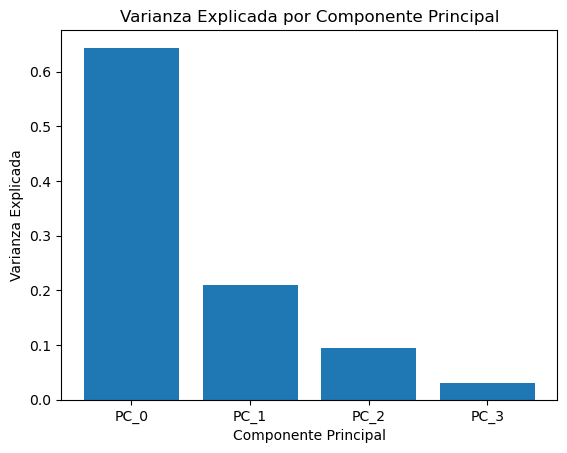

In [49]:
# Visualizo la varianza explicada por cada componente principal en un gráfico de barras
varianza_explicada = pca.explained_variance_ratio_
componentes = df_PCA_final_2.columns

plt.bar(componentes, 
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

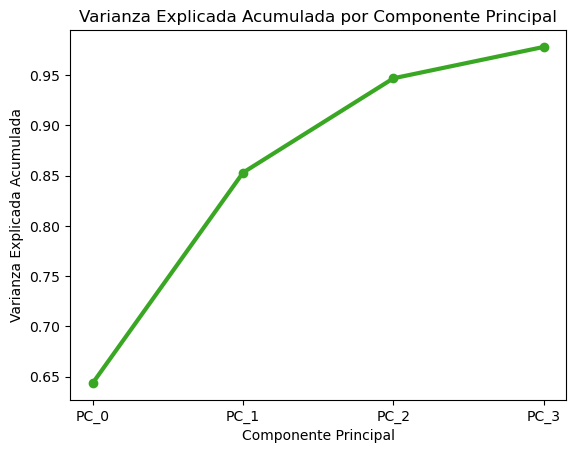

In [50]:
# Visualizo la varianza explicada acumulada
varianza_ac = np.cumsum(pca.explained_variance_ratio_)
componentes = df_PCA_final_2.columns

plt.plot(componentes, 
         varianza_ac,
         marker = 'o',
         color = '#3AA724',
         linewidth = 3)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.show()

Text(0.5, 1.0, 'Relación entre componentes y variable target')

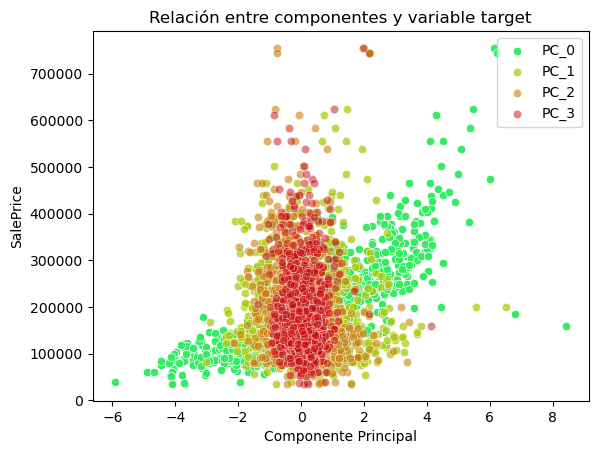

In [51]:
# Relación con el target 
df['PC_0'] = df_PCA_final_2['PC_0']
df['PC_1'] = df_PCA_final_2['PC_1']
df['PC_2'] = df_PCA_final_2['PC_2']
df['PC_3'] = df_PCA_final_2['PC_3']

plt.figure()
sns.scatterplot(data = df,
                x = 'PC_0',
                y = 'SalePrice',
               label='PC_0', 
               color = '#34EB63',
                alpha = 1)
sns.scatterplot(data = df, 
                x = 'PC_1', 
                y = 'SalePrice', 
                label = 'PC_1', 
                color = '#AACA0B',
                alpha = 0.75)
sns.scatterplot(data = df, 
                x = 'PC_2', 
                y = 'SalePrice', 
                label = 'PC_2', 
                color = '#CA7F0B',
                alpha = 0.6)
sns.scatterplot(data = df, 
                x = 'PC_3', 
                y = 'SalePrice', 
                label = 'PC_3', 
                color = '#CA0B0B',
                alpha = 0.5)
plt.xlabel('Componente Principal')
plt.ylabel('SalePrice')
plt.title('Relación entre componentes y variable target')

Aparantemente, solo el primer componente tiene una fuerte relación con la variable target. El resto de los componentes no parecen tener relación con el precio de venta de la casa.

Text(0.5, 1.0, 'Relación entre primer componente y variable target')

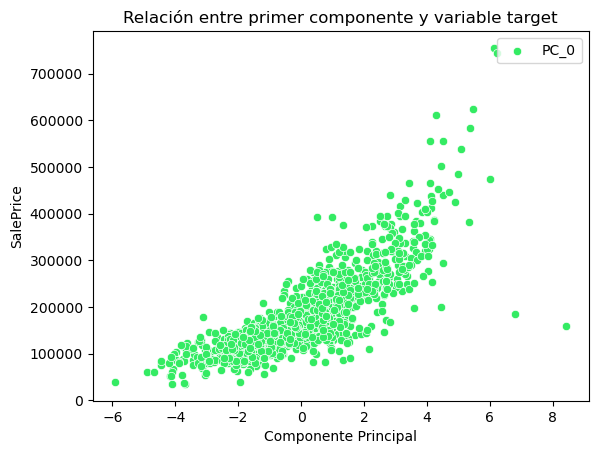

In [47]:
# Entonces, si tenemos en cuenta solo el primero? 
df['PC_0'] = df_PCA_final_2['PC_0']
plt.figure()
sns.scatterplot(data = df,
                x = 'PC_0',
                y = 'SalePrice',
               label='PC_0', 
               color = '#34EB63',
                alpha = 1)
plt.xlabel('Componente Principal')
plt.ylabel('SalePrice')
plt.title('Relación entre primer componente y variable target')

Como se observa en el gráfico de arriba, la correlación entre el primer componente principal que captura la variabilidad de las variables 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars' y 'TotRmsAbvGrd' muestra una estrecha relación con la variable target (SalePrice), incluso mucho más fuerte que cada variable tratada por separado. Veamos los coeficientes de correlación: 

In [44]:
ANALIZAR = df[['OverallQual','GrLivArea','GarageArea','GarageCars','TotRmsAbvGrd','PC_0','PC_1','PC_2','PC_3','SalePrice']]
print("Coeficientes de Correlación con variable target:")
ANALIZAR.corr(method = 'pearson')['SalePrice'].sort_values(ascending = False)

Coeficientes de Correlación con variable target:


SalePrice       1.000000
PC_0            0.823736
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotRmsAbvGrd    0.533723
PC_3            0.080319
PC_1            0.008885
PC_2           -0.238385
Name: SalePrice, dtype: float64

Efectivamente, la mayor correlación con SalePrice se observa con la variable PC_0, que es el primer componente principal! 